Present a flexible solution to calculate, plot and compare different similarity measures.

<h2>Import packages and data</h2>

In [7]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import comparing as comp
import plots
import numpy as np

In [8]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [9]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h2>Calculate, plot and compare different similarity measures</h2>

In [10]:
print(plots.plot_similarities.__doc__)


    Plot the similarity of a reference data series and all points on the map regarding different
    similarity measures.

    In order to make the values of the different similarity metrics comparable, they are binned in 10%
    bins using comparing.binning_values_to_quantiles.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        metrics (list): List with similarity metrics to compute similarity between two time series
        labels (list): List of labels for the metrics
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order
                                           to make the similarity values of different similarity metrics comparable
            Defaults to comp.binning_values_to_quantiles
        level (int, optional): Level on which the similarity should be calculated
            Defaults

<h3>We want to compare Mutual Information with Transfer Entropy and Cosine Similarity</h3>

In [11]:
metrics = [sim.mutual_information, comp.invert(sim.transfer_entropy), sim.cosine_similarity]

In [12]:
metric_labels = ["Mutual Information", "Transfer Entropy", "Cosine Similarity"]

<h5>To make the value ranges of different similarity metrics comparable, we need to scale them. First scaling method: Binning the values into the respective quantiles</h5>

In [13]:
print(comp.binning_values_to_quantiles.__doc__)


    Convert a map of values into n percentile bins.

    Each value on the map is replaced with the percentage bin it belongs to.
    0.3 means this value belongs to the 20%-30% bin which contains the 20%-30%
    smallest values of the map.

    All the bins have the same size

    Args:
        map_array (array): Map with values to scale
        num_bins (int): Number or bins

    Returns:
        Map with the bin numbers for each value
    


In [14]:
scaling_func = comp.binning_values_to_quantiles

<h3>1. Visualization: Whole period (Scaling: Binning to quantiles)</h3>

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:83: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i])


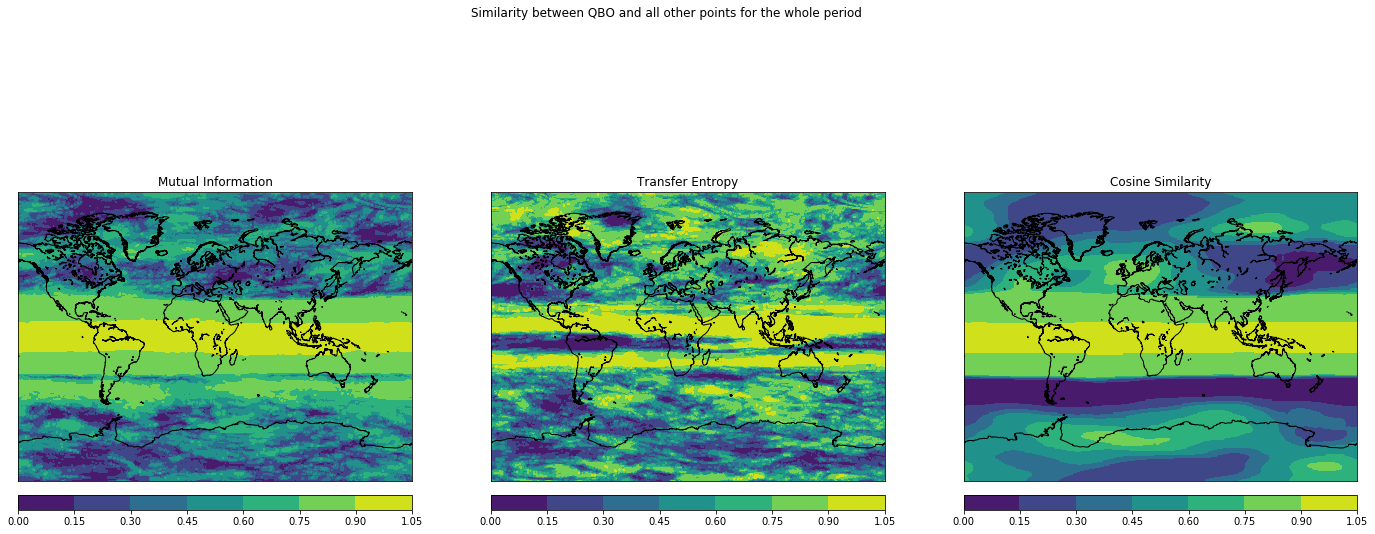

In [15]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, metric_labels, scaling_func, mode="whole_period")

<h3>2. Visualization: Whole period, every month seperately (Scaling: Binning to quantiles)</h3>

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:139: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[month][i])


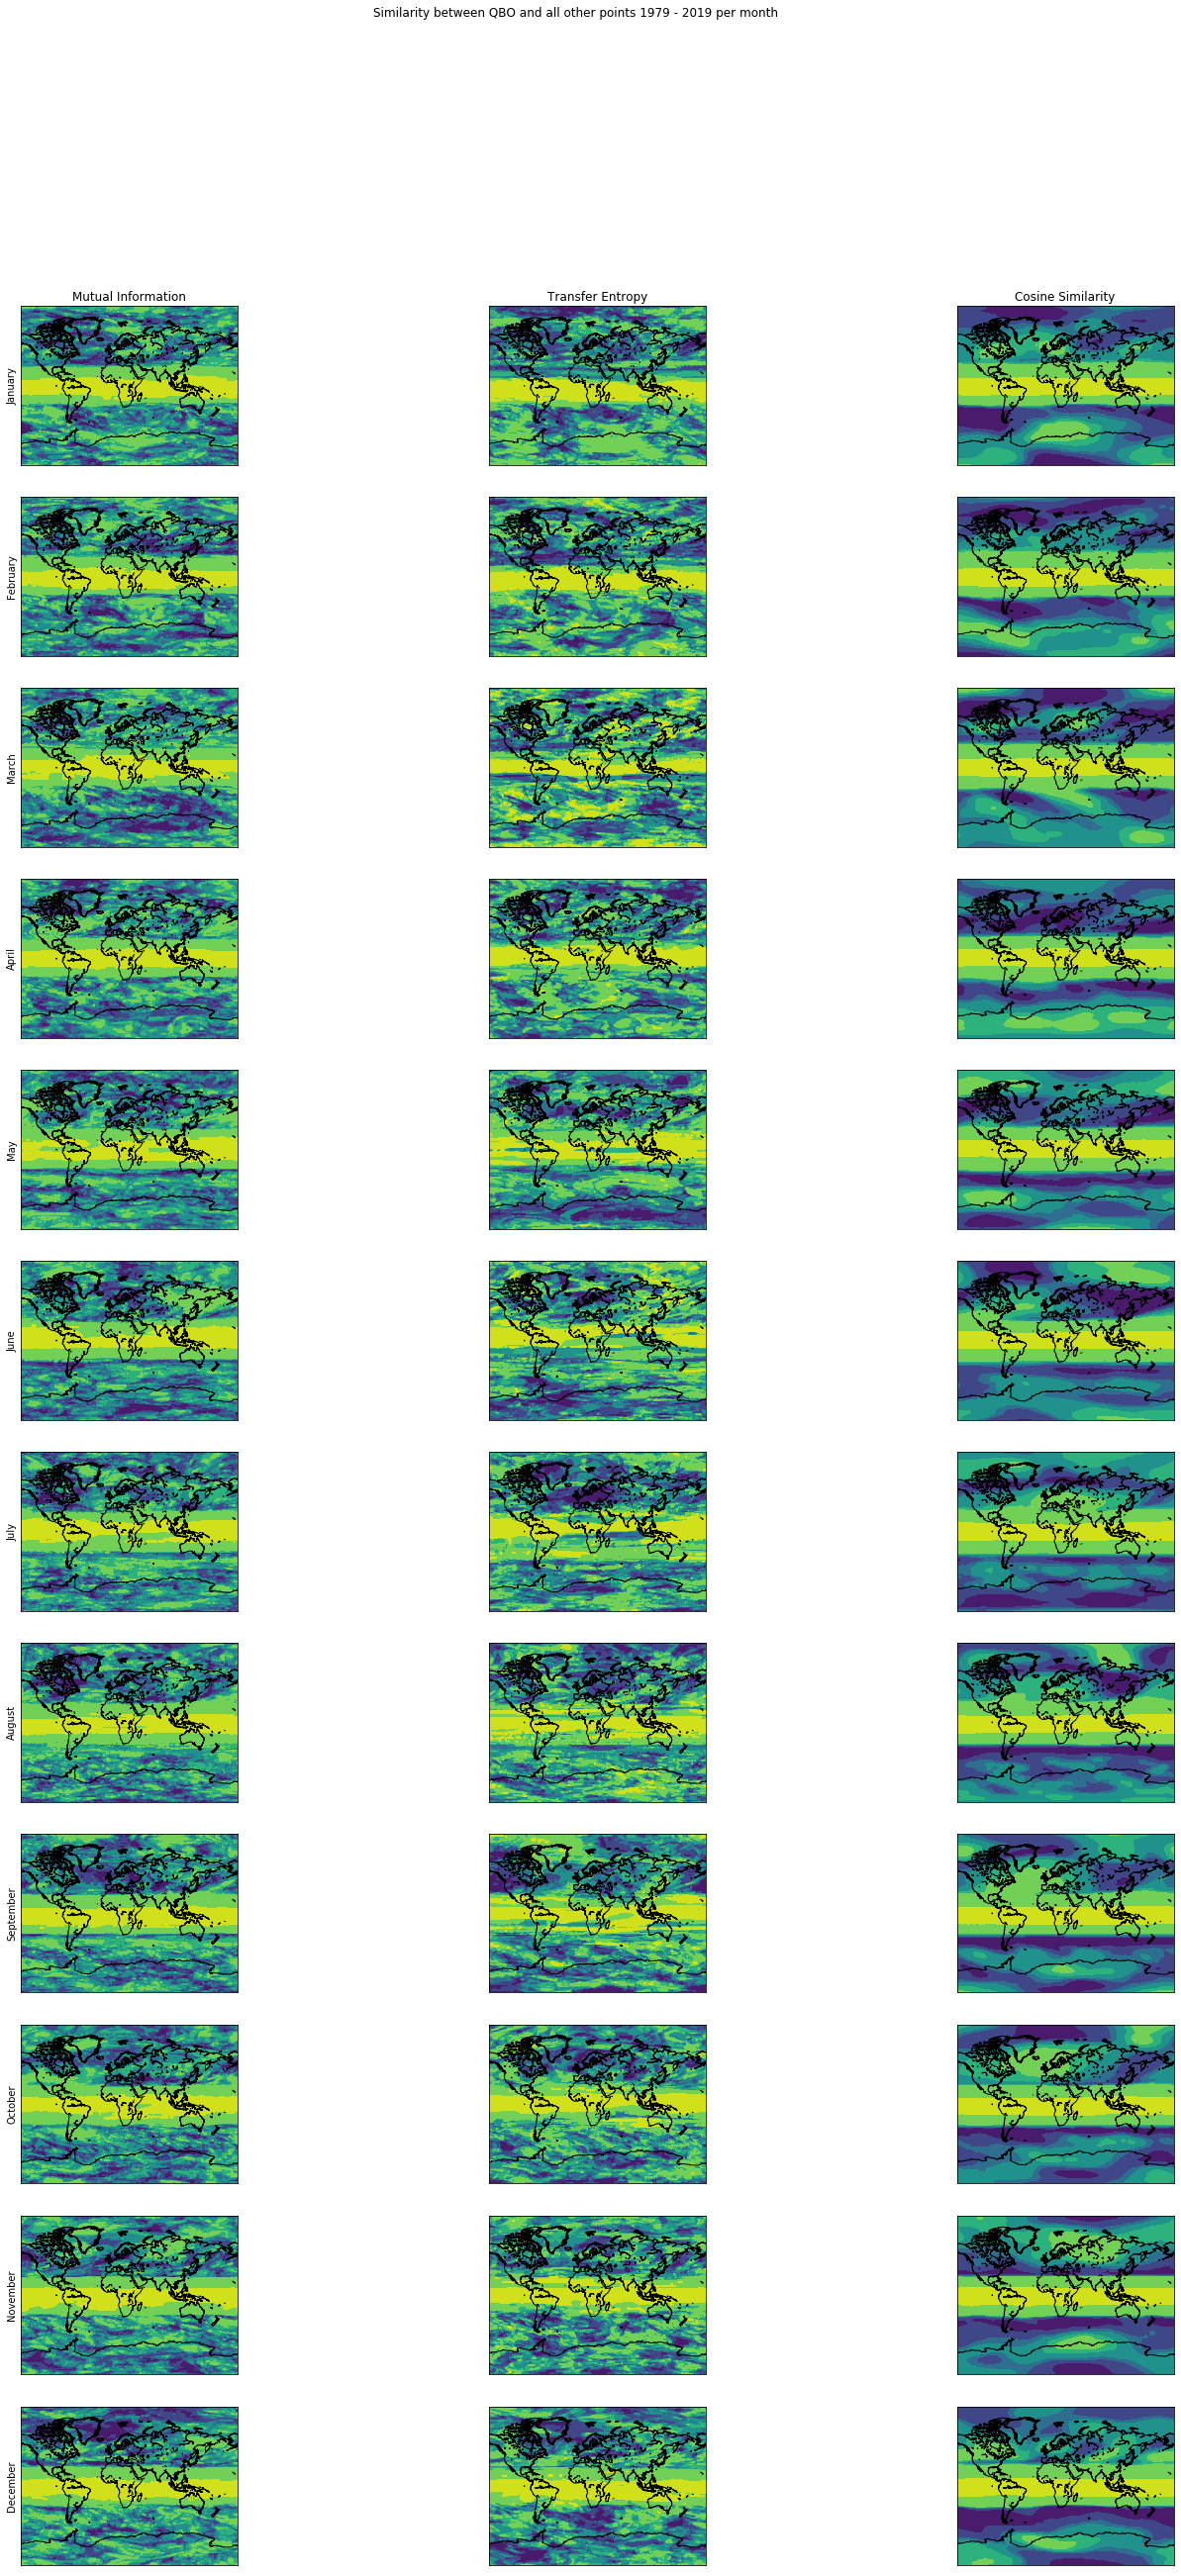

In [16]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, metric_labels, scaling_func, mode="whole_period_per_month")

<h3>3. Visualization: Whole period, but only winter months (Scaling: Binning to quantiles)</h3>

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:194: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i])


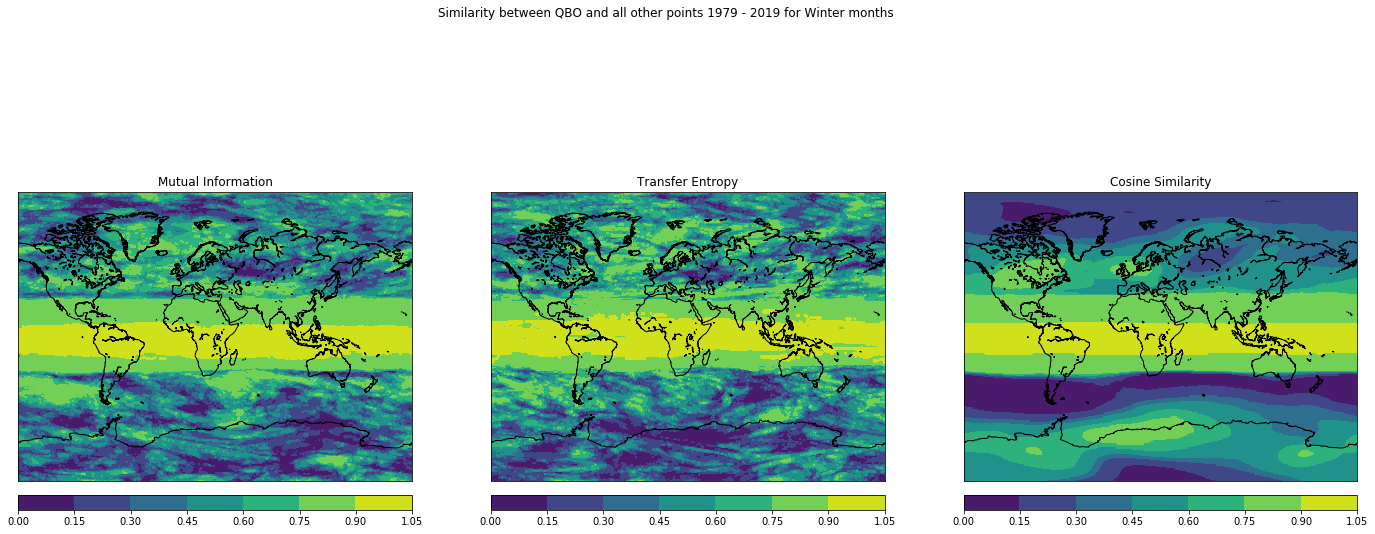

In [17]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, metric_labels, scaling_func, mode="whole_period_winter_only")

<h5>Another scaling method is histogram equalization</h5>

In [18]:
print(comp.equalize_histogram.__doc__)


    Scale a map of values using histogram equalization.

    It spreads out the most frequent intensity values, i.e. stretching out the
    value range of the map.

    Args:
        map_array (np.ndarray): Map with values to scale
        num_bins (int): Number or bins

    Returns:
        Map with the scaled values
    


In [19]:
scaling_func = comp.equalize_histogram

<h3>4. Visualization: Whole period (Scaling: Histogram equalization)</h3>

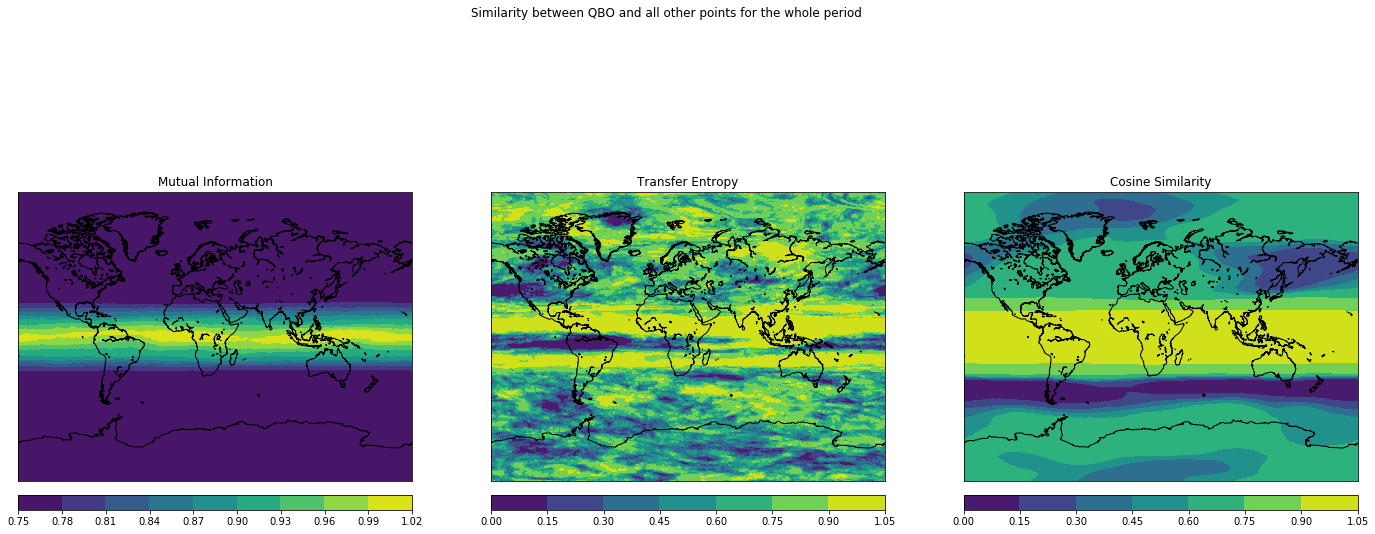

In [20]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, metric_labels, scaling_func, mode="whole_period")

<h3>5. Visualization: Whole period, every month seperately (Scaling: Histogram equalization)</h3>

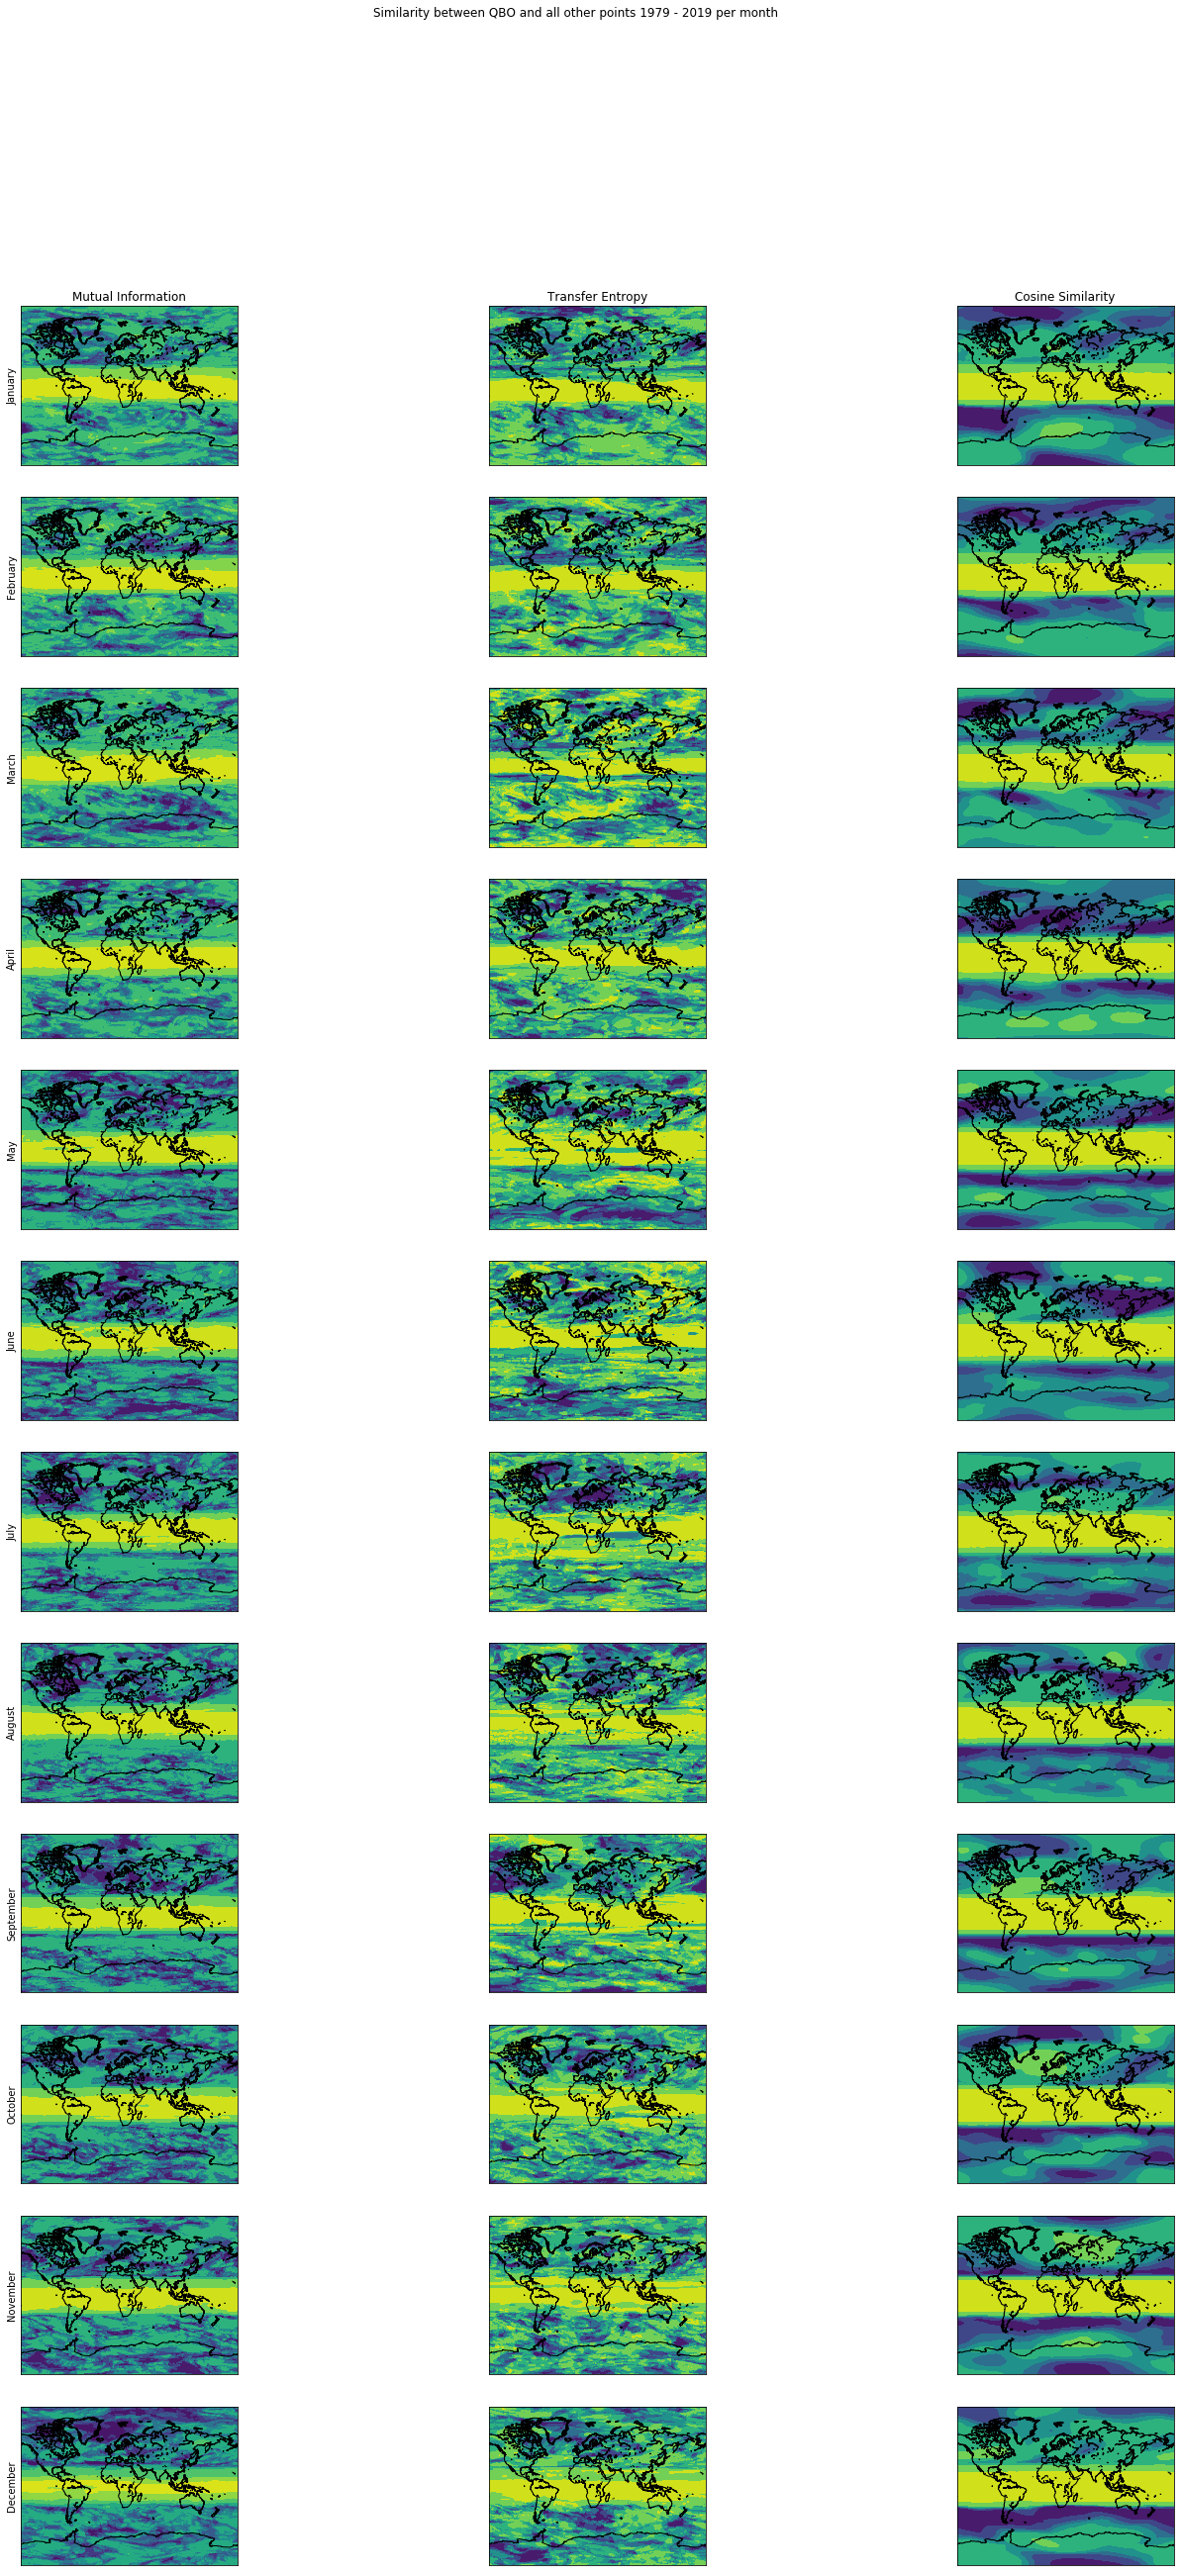

In [21]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, metric_labels, scaling_func, mode="whole_period_per_month")

<h3>6. Visualization: Whole period, but only winter months (Scaling: Histogram equalization)</h3>

In [22]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, metric_labels, scaling_func, mode="whole_period_winter_only")

<h5>Another scaling method is min-max normalization</h5>

In [23]:
print(comp.min_max_normalization.__doc__)


    Rescale a map of values ro range [a, b] using min-max normalization

    Args:
        map_array (np.ndarray): Map with values to scale
        a (int, optional): Lower bound
            Defaults to 0
        b (int, optional): Upper bound
            Defaults to 0

    Returns:
        Map with scaled values
    


In [24]:
scaling_func = comp.min_max_normalization

<h3>7. Visualization: Whole period (Scaling: Min-max scaling)</h3>

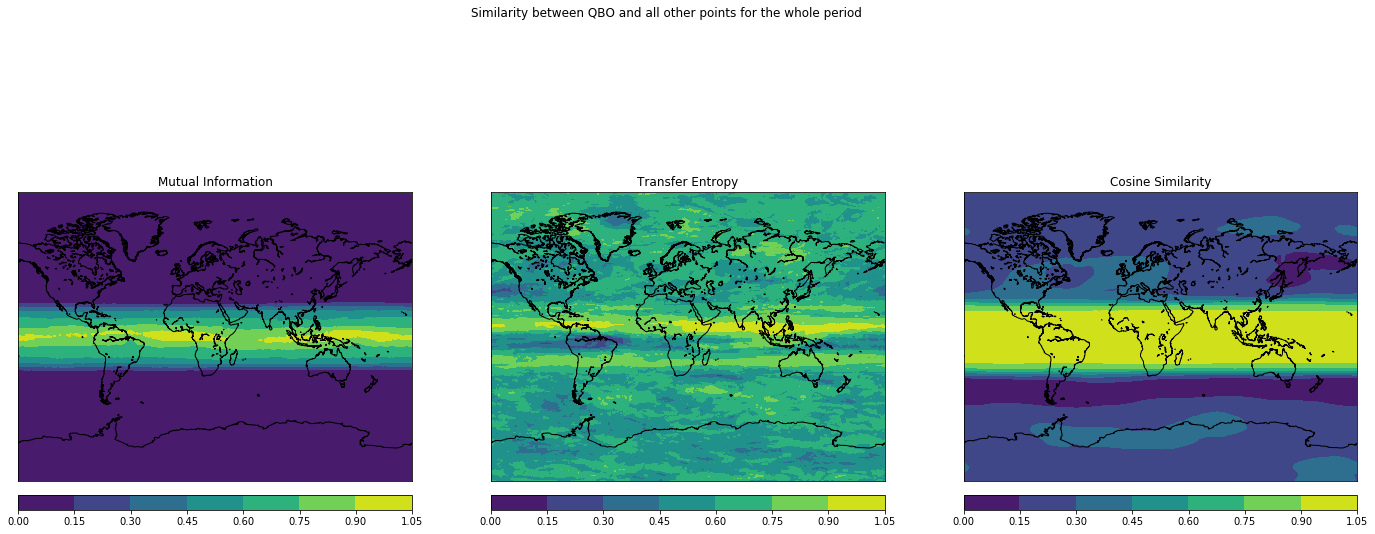

In [25]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, metric_labels, scaling_func, mode="whole_period")